In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('IMBD_movie_rating.csv')

In [3]:
data.head()

,Unnamed: 0,Title,Global_Rating,Gender,Runtime,ID_Movie,Voters,Date,User_rate,Review
0,0,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),8/10,This is a movie that plays on something everyo...
1,1,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),5/10,The hype for The Menu intrigued me. The review...
2,2,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),8/10,"This film was something else, I am genuinely s..."
3,3,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),6/10,"Nice try, but the satire doesn't land in this ..."
4,4,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),6/10,"""The Menu"" offers a trailer spectacular enough..."


In [4]:
print(len(data))

35484


In [5]:
print(data.isnull().sum())

Unnamed: 0       0
Title            0
Global_Rating    0
Gender           0
Runtime          0
ID_Movie         0
Voters           0
Date             0
User_rate        0
Review           0
dtype: int64


In [6]:
duplicate = data.duplicated()
print(duplicate)

0        False
1        False
2        False
3        False
4        False
         ...  
35479    False
35480    False
35481    False
35482    False
35483    False
Length: 35484, dtype: bool


In [7]:
view_duplicates = data[data.duplicated()]
print(view_duplicates)

Empty DataFrame
Columns: [Unnamed: 0, Title, Global_Rating, Gender, Runtime, ID_Movie, Voters, Date, User_rate, Review]
Index: []


In [8]:
data.head(1)

,Unnamed: 0,Title,Global_Rating,Gender,Runtime,ID_Movie,Voters,Date,User_rate,Review
0,0,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),8/10,This is a movie that plays on something everyo...


In [9]:
modify_columns = {
    "Unnamed: 0" : "unnamed"
}

data = data.rename(columns=modify_columns)

In [10]:
data.head(1)

,unnamed,Title,Global_Rating,Gender,Runtime,ID_Movie,Voters,Date,User_rate,Review
0,0,The Menu,7.2,Comedy Horror Thriller,107,tt9764362,175230,(2022),8/10,This is a movie that plays on something everyo...


In [11]:
data = data.drop(["unnamed", "Title", "Gender", "Runtime", "ID_Movie", "Voters", "User_rate", "Date"], axis=1)

In [12]:
data.sample(2)

,Global_Rating,Review
8309,5.5,The stage curtains open ...I was wondering wha...
23927,4.6,I love the character of Erica Tate portrayed b...


In [13]:
import re
# Text cleaning function
def clean_text(Review):
    Review = Review.lower()
    Review = re.sub(r'http\S+', '', Review)  # remove URLs
    Review = re.sub(r'@\w+', '', Review)     # remove mentions
    Review = re.sub(r'#\w+', '', Review)     # remove hashtags or keep if needed
    Review = re.sub(r'[^a-z\s]', '', Review) # keep alphabets and space
    Review = re.sub(r'\s+', ' ', Review).strip() # clean extra spaces
    return Review

data['Review'] = data['Review'].apply(clean_text)


In [14]:
data.describe()

,Global_Rating
count,35484.000000
mean,5.729966
std,1.294841
min,1.100000
25%,4.900000
50%,5.800000
75%,6.700000
max,8.800000


In [15]:
mean_likes = data['Global_Rating'].mean()

data['rate_label'] = data['Global_Rating'].apply(lambda x: 1 if x > mean_likes else 0)

print("Mean likes:", mean_likes)
print(data[['Global_Rating', 'rate_label']].head())

Mean likes: 5.729965618306843
   Global_Rating  rate_label
0            7.2           1
1            7.2           1
2            7.2           1
3            7.2           1
4            7.2           1


In [16]:
X = data['Review']
y = data['rate_label']

In [17]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=15000)
xv_train = vectorizer.fit_transform(X_train)
xv_test = vectorizer.transform(X_test)


In [19]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(xv_train, y_train)
ypred_nb = nb.predict(xv_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, ypred_nb))
print(classification_report(y_test, ypred_nb))

Naive Bayes Accuracy: 0.7295682561154323
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      4130
           1       0.73      0.77      0.75      4741

    accuracy                           0.73      8871
   macro avg       0.73      0.73      0.73      8871
weighted avg       0.73      0.73      0.73      8871



In [20]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(xv_train, y_train)
ypred_rf = rf.predict(xv_test)
print('Random Forest Accuracy:', accuracy_score(y_test, ypred_rf))
print(classification_report(y_test, ypred_rf))

Random Forest Accuracy: 0.6950738360951415
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      4130
           1       0.69      0.78      0.73      4741

    accuracy                           0.70      8871
   macro avg       0.70      0.69      0.69      8871
weighted avg       0.70      0.70      0.69      8871



In [21]:
# Logistic Regression
lr = LogisticRegression(max_iter=200, random_state=42)
lr.fit(xv_train, y_train)
ypred_lr = lr.predict(xv_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, ypred_lr))
print(classification_report(y_test, ypred_lr))


Logistic Regression Accuracy: 0.7320482470972833
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      4130
           1       0.74      0.78      0.76      4741

    accuracy                           0.73      8871
   macro avg       0.73      0.73      0.73      8871
weighted avg       0.73      0.73      0.73      8871



In [22]:
svm = SVC(kernel='linear')
svm.fit(xv_train, y_train)


SVC(kernel='linear')

In [23]:
y_pred = svm.predict(xv_test)

In [24]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy: 0.7338518769022658
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      4130
           1       0.75      0.76      0.75      4741

    accuracy                           0.73      8871
   macro avg       0.73      0.73      0.73      8871
weighted avg       0.73      0.73      0.73      8871



In [25]:
from textblob import TextBlob

# TextBlob
tb_preds = [1 if TextBlob(text).sentiment.polarity > 0 else 0 for text in X_test]
print('TextBlob Accuracy:', accuracy_score(y_test, tb_preds))
print(classification_report(y_test, tb_preds))

TextBlob Accuracy: 0.6071468831022433
              precision    recall  f1-score   support

           0       0.65      0.33      0.44      4130
           1       0.59      0.85      0.70      4741

    accuracy                           0.61      8871
   macro avg       0.62      0.59      0.57      8871
weighted avg       0.62      0.61      0.58      8871



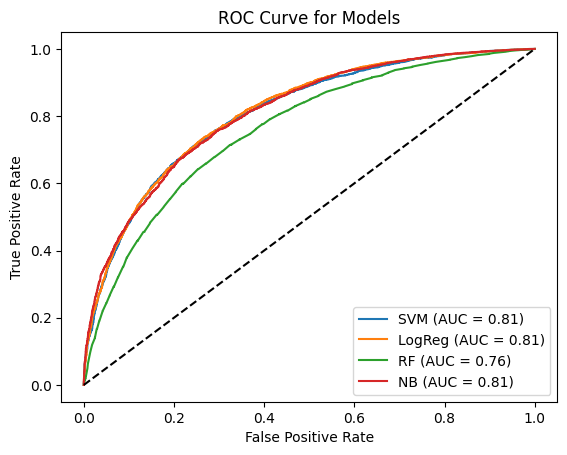

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Example for SVM
# svm = SVC(kernel='linear', probability=True, random_state=42)
# svm.fit(xv_train, y_train)
# y_pred = svm.predict(xv_test)
y_score = svm.decision_function(xv_test)
  # Probability estimates for positive class

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
plt.plot(fpr, tpr, label='SVM (AUC = %.2f)' % auc)

# Repeat for other models, e.g.:
# Logistic Regression
y_proba_lr = lr.predict_proba(xv_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, label='LogReg (AUC = %.2f)' % auc_lr)

# Random Forest
y_proba_rf = rf.predict_proba(xv_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = %.2f)' % auc_rf)

# Naive Bayes
y_proba_nb = nb.predict_proba(xv_test)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = roc_auc_score(y_test, y_proba_nb)
plt.plot(fpr_nb, tpr_nb, label='NB (AUC = %.2f)' % auc_nb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Models')
plt.legend()
plt.show()
